<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/Parciales2021_2/P1_SyS2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 - Señales y Sistemas - 2021 - II



# Pregunta 1

Grafique la señal $x(t) = A t e^{j \omega_c t}\left(u(-t-5)-u(t+10)\right),$ bosquejo en función de $A,\omega_c\in \mathbb{R}^{+}$ y $t\in \mathbb{R}$, y demuestre si la señal es periódica, aperiódica, o cuasiperiódica. (Valor 1.25 puntos).




In [ ]:
import sympy as sym
sym.init_printing()
t, w, A = sym.symbols('t omega A',real = True)
x = A*t*sym.exp(1j*w*t)*(sym.Heaviside(t+5)-sym.Heaviside(t+10))
x

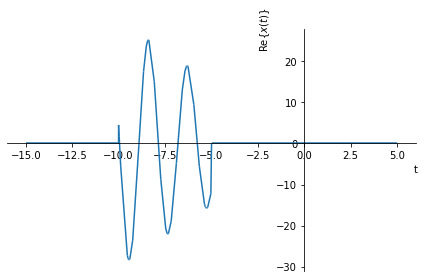

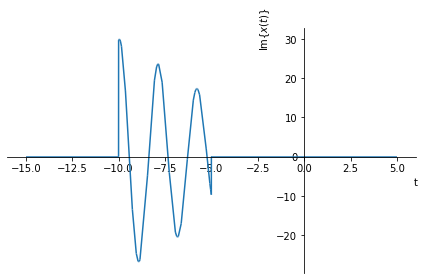

In [ ]:
#se grafica parte real y parte imaginaria
y = x.subs({w: 3, A : 3}) #sustituir variables para graficar
sym.plot(sym.re(y), (t, -15, 5), ylabel=r'Re{$x(t)$}') 
sym.plot(sym.im(y), (t, -15,5), ylabel=r'Im{$x(t)$}')


Para determinar si $x(t)$ si es periódica, se debe cumplir que:

$$x(t)=x(t\pm T)$$

para un único $T\in\mathbb{R}.$ 

Dado que se presenta una multiplicación por funciones Heaviside restadas, y según la gráfica presentada, no existe un $T$ que cumpla la definición de periodicidad. Además, dado que no se cuenta con sumas de señales periódicas en $x(t)$, no es cuasiperiódica. En conclusión, $x(t)\neq x(t\pm T),$ y $x(t)$ es aperiódica.



# Pregunta 2

Determine si la señal $x(t)$ en la pregunta 1 es de energía o potencia. Demuestre matemáticamente sus razonamientos. (Valor 1.25 punto).

Para determinar si $x(t)$ es de energía, se plantea la siguiente integral:

$$\lim_{T\to \infty}E_x=\lim_{T\to \infty}\int_{-T/2}^{T/2}|x(t)|^2 dt = \lim_{T\to \infty}\int_{-T/2}^{T/2}|A t e^{j \omega_c t}\left(u(-t-5)-u(t+10)\right)|^2dt$$

dado que se cuenta con un intervalo de interés según los escalones restados en $x(t),$ entonces:



$$\lim_{T\to \infty}E_x=\int_{-10}^{-5}|A t e^{j \omega_c t}|^2dt=\int_{-10}^{-5}A^2 t^2 e^{j \omega_c t-j \omega_c t}dt=\int_{-10}^{-5}A^2 t^2 e^{0}dt$$

$$\lim_{T\to \infty}E_x=\int_{-10}^{-5}A^2 t^2dt = A^2\frac{t^3}{3}\Big|^{-5}_{-10}= A^2\left(\frac{(-5)^3}{3}-\frac{(-10)^3}{3}\right)=\frac{A^2}{3}(-125+1000)=\frac{875}{3}A^2$$

Dado que $0<\lim_{T\to\infty}E_x<\infty$, para $A<\infty$, $x(t)$ es señal de energía.

Además

$$\lim_{T\to\infty}P_x = \lim_{T\to\infty}\frac{1}{T}E_x =\lim_{T\to\infty}\frac{1}{T}\frac{875}{3}A^2 \to 0$$.

$x(t)$ no es señal de potencia.

In [ ]:
#comprobar Energía con sympy
x2 = A*t*sym.exp(1j*w*t)
Ex = sym.integrate(x2*sym.conjugate(x2),(t,-10,-5))
Ex

# Pregunta 3

Sean los sistemas lineales e invariantes con el tiempo (SLIT), $\mathcal{H}_1\{\cdot\}$ y $\mathcal{H}_2\{\cdot\}$, conectados en cascada: $y[n]=\mathcal{H}_2\{\mathcal{H}_1\{x[n]\}\}.$ El sistema $\mathcal{H}_1$ cuenta con respuesta al impulso $[-3^{\S},1,0,2,1],$ donde $^\S$ indica la posición $n=0$. Además, el sistema $\mathcal{H}_2$ cuenta con respuesta al escalón  $[-2^\S,0,2,1,-1].$ Encuentre la salida $y[n]$ para la entrada $x[n]=[-2^\S,0,0,5,3,-1].$ (Valor 2.5 puntos)

La salida de un sistema SLIT, se puede calcular mediante la convoluación entre la respuesta al impulso del sistema y la señal de entrada:

$$y[n]= x[n]*h[n] = \sum_{k=-\infty}^{\infty}x[k]h[n-k]$$

Para el caso de la respuesta al escalón, la respuesta al impulso se puede estimar desde la derivada (diferencia para el tiempo discreto) de la respuesta escalón:

$$h[n]= {\rm{diff}}\{s[n]\} = s[n]-s[n-1]$$.

Por consiguiente, la salida del sistema para la evaluación en cascada $y[n]=\mathcal{H}_2\{\mathcal{H}_1\{x[n]\}\},$ se puede calcular como:


$$y[n] = {\rm{diff}}\{s_2[n]\}*(h_1[n]*x[n])=h_2[n]*h_1[n]*x[n]$$.

A continuación, se presentan las simulaciones respectivas.

In [ ]:
%matplotlib inline
from ipywidgets import interact #crear gráficos interactivos
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

# salida en cascada:
x = np.array([-2,0,0,5,3,-1]).reshape(-1)#entrada
h1 = np.array([-3,1,0,2,1]).reshape(-1) #respuesta impulso H1
s2 = np.array([-2,0,2,1,-1]).reshape(-1)#respuesta escalón H2
h2 = np.diff(s2) #respuesta impulso h2 desde s2
print('h1:',h1)
print('h2:',h2)
#se genera convolución salida parcial 1
y1 = np.convolve(x,h1)
#se genera convolución salida parcial 2
y2 = np.convolve(y1,h2)
print('h1:',h1)
print('h2:',h2)
print('y1:',y1)
print('y2:',y2)

h1: [-3  1  0  2  1]
h2: [ 2  2 -1 -2]
h1: [-3  1  0  2  1]
h2: [ 2  2 -1 -2]
y1: [  6  -2   0 -19  -6   6   9  11   1  -1]
y2: [ 12   8 -10 -48 -46  19  74  46   3 -29 -25  -1   2]


Se presenta el ejemplo ilustrativo para $x[n]*h_1[n]$ mediante método gráfico:

In [ ]:
#funciones graficar convolución
def convgraf(h,x): #función general para pintar proceso de convolución de forma interactiva
   lx = len(x)
   lh = len(h)
   M = 2*lh+lx # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso
   hm = np.zeros((M,M))
   xm = np.r_[np.zeros((lh,1)),x,np.zeros((lh,1))]
   ym = np.zeros((M,M))
   for i in range(M-lh+1):
     #print(i)
     hm[i:i+lh,i] = np.flip(h).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos
     ym[i,i] = xm.T.dot(hm[:,i]) #multiplicacion entre vectores -> producto punto
   return xm, ym, hm  

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(hm[:,k],markerfmt='+',label='$h[n-k]$')
     plt.stem(xm,linefmt='g',markerfmt='.',label='$x[k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return

xm, ym, hm = convgraf(h1.reshape(-1,1),x.reshape(-1,1)) 

In [ ]:
#@interact(m=range(xm.shape[0]-len(x)+1)) #define panel tipo selección en el gráfico interactivo
@interact(n=(0, xm.shape[0]-len(x), 1)) #se plantean las gráficas para todos lo valores de n
def show_frame(n=0):
    plot_conv(n,xm,ym,hm)
plt.show()    

interactive(children=(IntSlider(value=0, description='n', max=10), Output()), _dom_classes=('widget-interact',…

In [ ]:
np.diag(ym)

array([  0.,   6.,  -2.,   0., -19.,  -6.,   6.,   9.,  11.,   1.,  -1.,
         0.,   0.,   0.,   0.,   0.])

In [ ]:
#slit 2
xm2, ym2, hm2 = convgraf(h2.reshape(-1,1),np.diag(ym).reshape(-1,1)) 

In [ ]:
@interact(n=(0, xm2.shape[0]-len(np.diag(ym)), 1)) #se plantean las gráficas para todos lo valores de n
def show_frame(n=0):
    plot_conv(n,xm2,ym2,hm2)
plt.show() 

interactive(children=(IntSlider(value=0, description='n', max=8), Output()), _dom_classes=('widget-interact',)…

In [ ]:
np.diag(ym2)

array([  0.,   0.,  12.,   8., -10., -48., -46.,  19.,  74.,  46.,   3.,
       -29., -25.,  -1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.])